<br><br><br>
<center> <h3 style="color:#005B9A">===============================================================</h3> </center>
<center> <h3 style="color:teal"> بِسمِ اللہِ الرَّحمٰنِ الرَّحِيم</h3> </center>
<center> <h3 style="color:teal"> In the Name of Allah, the Most Beneficent, the Most Merciful</h3> </center>
<center> <h3 style="color:#005B9A">===============================================================</h3> </center>
<br><br><br>

# Step 1: Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

print("Setup Complete")

Setup Complete


# Step 2: Load Sample Data

In [2]:
# Load Sample Data

''' 
*---------------------- LOAD_SAMPLE_DATA ------------------------*
|     Function: read_csv()                                       |
|             Purpose: Read a dataset in CSV file format         |
|     Arguments:                                                 |
|             path: Path to dataset file                         |
|             dataset: Dataset file name                         |
|     Return:                                                    |
|             dataset: Dataset in DataFrame format               |
*----------------------------------------------------------------*
'''
 
iot_sample_data = pd.read_csv("iot_sample_data_annotated.csv")

print("\n\nIOT system data:")
print("=================\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
iot_sample_data.head()



IOT system data:



,Temp1,HR,Spo2,BP,GL,Condition
0,Normal,Normal,Critical,Elevated,Normal,Critical
1,Low,Normal,Worrisome,Elevated,Low,Critical
2,Low,Low,Worrisome,Normal,Elevated,Unhealthy
3,Low,Normal,Worrisome,Normal,Low,Critical
4,Low,Low,Normal,Normal,Elevated,Unhealthy


# Step 3: Understand and Pre-process Sample Data
## Step 3.1: Understand Sample Data

In [3]:
# Understand Sample Data

print("\n\nAttributes in Sample Data:")
print("==========================\n")

print(iot_sample_data.columns)

print("\n\nNumber of Instances in Sample Data:",iot_sample_data["Condition"].count())
print("========================================\n")



Attributes in Sample Data:

Index(['Temp1', 'HR', 'Spo2', 'BP', 'GL', 'Condition'], dtype='object')


Number of Instances in Sample Data: 100



## Step 3.2: Pre-process Sample Data
    o	Sample Data is already Preprocessed
    o	No Preprocessing needs to be Performed

# Step 4: Feature Extraction
    o	Features are already Extracted
    o	No Feature Extraction needs to be Performed

# Step 5: Label Encoding the Sample Data (Input and Output is converted in Numeric Representation)
## Step 5.1: Train the Label Encoder

In [4]:
# Train the Label Encoder

''' 
*------------------ TRAIN_LABEL_ENCODER --------------------*
|        Function: Fit()                                    |
|              Purpose: Fit or Train the Label Encoder      |
|        Arguments:                                         |
|               Labels: Target Values                       |
|        Return:                                            |
|               Instance: Returns an instance of self       |
*-----------------------------------------------------------*
''' 

# Labels

temp1 = pd.DataFrame({"Temp1":['Low','Normal','High']})
hr = pd.DataFrame({"HR":['Low','Normal','High']})
spo2 = pd.DataFrame({"Spo2":['Critical','Worrisome','Normal']})
bp = pd.DataFrame({"BP":['Elevated','Normal','Low','High']})
gl = pd.DataFrame({"GL":['Elevated','Normal','Low','High']})
condition = pd.DataFrame({"Condition":['Critical','Unhealthy','Very Critical','Very Unhealthy','Moderate','Healthy']})

# Initialize the Label Encoders 

temp1_label_encoder = LabelEncoder()
hr_label_encoder = LabelEncoder()
spo2_label_encoder = LabelEncoder()
bp_label_encoder = LabelEncoder()
gl_label_encoder = LabelEncoder()
condition_label_encoder = LabelEncoder()

# Train the Label Encoders

temp1_label_encoder.fit(np.ravel(temp1))
hr_label_encoder.fit(np.ravel(hr))
spo2_label_encoder.fit(np.ravel(spo2))
bp_label_encoder.fit(np.ravel(bp))
gl_label_encoder.fit(np.ravel(gl))
condition_label_encoder.fit(np.ravel(condition))

LabelEncoder()

## Step 5.2: Label Encode the Output

In [5]:
# Label Encoding of the Output

''' 
*------------------ LABEL_ENCODE_OUTPUT --------------------*
|        Function: Transform()                              |
|              Purpose: Transform Input (Categorical)       |
|                       into Numerical Representation       |
|        Arguments:                                         |
|              Attribute: Target values                     |
|        Return:                                            |
|              Attribute: Numerical Representation          |
*-----------------------------------------------------------*
'''

# Transform Output of into Numerical Representation

print("\n\nCondition Attribute After Label Encoding:")
print("========================================\n")
iot_sample_data["Condition"] = condition_label_encoder.transform(iot_sample_data["Condition"])
iot_sample_data.head()



Condition Attribute After Label Encoding:



,Temp1,HR,Spo2,BP,GL,Condition
0,Normal,Normal,Critical,Elevated,Normal,0
1,Low,Normal,Worrisome,Elevated,Low,0
2,Low,Low,Worrisome,Normal,Elevated,3
3,Low,Normal,Worrisome,Normal,Low,0
4,Low,Low,Normal,Normal,Elevated,3


## Step 5.3: Label Encode the Input

In [6]:
# Label Encoding of the Input

''' 
*------------------- LABEL_ENCODE_INPUT --------------------*
|        Function: Transform()                              |
|              Purpose: Transform Input (Categorical)       |
|                          into Numerical Representation    |
|        Arguments:                                         |
|              Attribute: Target values                     |
|        Return:                                            |
|              Attribute: Numerical Representation          |
*-----------------------------------------------------------*
'''

# Transform Input Attributes into Numerical Representation
iot_sample_data["Temp1"] = temp1_label_encoder.transform(iot_sample_data["Temp1"])
iot_sample_data["HR"] = hr_label_encoder.transform(iot_sample_data["HR"])
iot_sample_data["Spo2"] = spo2_label_encoder.transform(iot_sample_data["Spo2"])
iot_sample_data["BP"] = bp_label_encoder.transform(iot_sample_data["BP"])
iot_sample_data["GL"] = gl_label_encoder.transform(iot_sample_data["GL"])
print("\n\nIOT Sample Data after Label Encoding:")
print("=================================\n")
iot_sample_data.head()



IOT Sample Data after Label Encoding:



,Temp1,HR,Spo2,BP,GL,Condition
0,2,2,0,0,3,0
1,1,2,2,0,2,0
2,1,1,2,3,0,3
3,1,2,2,3,2,0
4,1,1,1,3,0,3


# Step 6: Execute the Training Phase 
## Step 6.1: Splitting Sample Data into Training Data and Testing Data

In [7]:
# Splitting Sample Data into Training Data and Testing Data

''' 
*------------------- SPLIT_SAMPLE_DATA ---------------------*
|        Function: train_test_split()                       |
|              Purpose: Split arrays or matrices into       |
|                       random train and test subsets       |
|        Arguments:                                         |
|              arrays: sequence of indexables               |
|              test_size: float or int                      |
|        Return:                                            |
|              splitting: list                              |
*-----------------------------------------------------------*
'''

training_data_encoded, testing_data_encoded = train_test_split( iot_sample_data , test_size=0.2 , random_state=0 , shuffle = False)

# print Training and Testing Data
print("\n\nTraining Data:")
print("==============\n")
training_data_encoded



Training Data:



,Temp1,HR,Spo2,BP,GL,Condition
0,2,2,0,0,3,0
1,1,2,2,0,2,0
2,1,1,2,3,0,3
3,1,2,2,3,2,0
4,1,1,1,3,0,3
5,2,1,1,0,1,0
6,2,1,1,0,2,0
7,2,1,1,0,2,0
8,0,1,1,0,3,3
9,2,1,1,3,1,0


In [8]:
print("\n\nTesting Data:")
print("==============\n")
testing_data_encoded



Testing Data:



,Temp1,HR,Spo2,BP,GL,Condition
80,1,2,1,3,3,2
81,1,2,1,3,3,2
82,1,2,1,3,1,0
83,0,2,1,0,2,0
84,1,2,0,3,2,4
85,1,1,0,3,3,0
86,1,1,1,2,3,5
87,1,1,0,2,1,4
88,1,1,0,2,2,4
89,1,1,0,2,3,0


## Step 6.2: Splitting Input Vectors and Outputs / Labels of Training Data

In [9]:
# Splitting Input Vectors and Outputs / Labels of Training Data

'''
*---------------- SPLIT_INPUT_VECTORS_AND_LABELS --------------*
|        Function: iloc()                                      |
|            Purpose: Splitting Input Vector and Labels        |
|        Arguments:                                            |
|            Attribute: Name or Location Attribute to Split    |
|        Return:                                               |
|            Attribute: Split Attributes                       |
*--------------------------------------------------------------*
'''

print("\n\nInputs Vectors (Feature Vectors) of Training Data:")
print("==================================================\n")
input_vector_train = training_data_encoded.iloc[: , :-1]
print(input_vector_train)

print("\n\nOutputs Labels of Training Data:")
print("================================\n")
print("Condition")
output_label_train = training_data_encoded.iloc[: ,-1]
print(output_label_train)



Inputs Vectors (Feature Vectors) of Training Data:

    Temp1  HR  Spo2  BP  GL
0       2   2     0   0   3
1       1   2     2   0   2
2       1   1     2   3   0
3       1   2     2   3   2
4       1   1     1   3   0
5       2   1     1   0   1
6       2   1     1   0   2
7       2   1     1   0   2
8       0   1     1   0   3
9       2   1     1   3   1
10      2   1     1   2   3
11      2   1     1   2   1
12      2   1     1   2   2
13      2   2     0   0   2
14      2   1     0   2   1
15      1   2     0   3   3
16      1   1     0   3   1
17      1   1     0   3   2
18      1   1     1   3   2
19      1   1     0   3   2
20      1   1     1   3   1
21      1   1     1   2   1
22      1   1     1   2   2
23      1   1     1   2   2
24      1   1     1   2   2
25      1   1     1   2   2
26      1   1     1   2   2
27      1   1     1   2   1
28      1   1     1   2   3
29      1   1     1   2   1
30      2   1     1   2   1
31      1   1     1   3   3
32      1   1     2   

## 6.3: Train the Support Vector Classifier

In [10]:
# Train the Support Vector Classifier

''' 
*--------------- TRAIN_SUPPORT_VECTOR_CLASSIFIER ------------------*
|       Function: svm.SVC()                                        |
|           Purpose: Train the Algorithm on Training Data          |
|       Arguments:                                                 |
|           Training Data: Provide Training Data to the Model      |
|       Return:                                                    |
|           Parameter: Model return the Training Parameters        |
*------------------------------------------------------------------*
'''

print("\n\nTraining the Support Vector Classifier on Training Data")
print("========================================================\n")
print("\nParameters and their values:")
print("============================\n")
svc_model = svm.SVC(gamma='auto',random_state=0)
svc_model.fit(input_vector_train,np.ravel(output_label_train))
print(svc_model)



Training the Support Vector Classifier on Training Data


Parameters and their values:

SVC(gamma='auto', random_state=0)


In [11]:
# Train the GaussianNB Classifier

''' 
*--------------- TRAIN_SUPPORT_VECTOR_CLASSIFIER ------------------*
|       Function: GaussianNB()                                     |
|           Purpose: Train the Algorithm on Training Data          |
|       Arguments:                                                 |
|           Training Data: Provide Training Data to the Model      |
|       Return:                                                    |
|           Parameter: Model return the Training Parameters        |
*------------------------------------------------------------------*
'''

print("\n\nTraining GaussianNB on Training Data")
print("========================================================\n")
# training the model on training set
gnb_model = GaussianNB()
gnb_model.fit(input_vector_train,output_label_train)



Training GaussianNB on Training Data



GaussianNB()

In [12]:
# Train the DecisionTree Classifier

''' 
*--------------- TRAIN_SUPPORT_VECTOR_CLASSIFIER ------------------*
|       Function: DecisionTreeClassifier()                         |
|           Purpose: Train the Algorithm on Training Data          |
|       Arguments:                                                 |
|           Training Data: Provide Training Data to the Model      |
|       Return:                                                    |
|           Parameter: Model return the Training Parameters        |
*------------------------------------------------------------------*
'''

print("\n\nTraining DecisionTree on Training Data")
print("========================================================\n")
# training the model on training set
dct_model = DecisionTreeClassifier(criterion='entropy', random_state=1)
dct_model.fit(input_vector_train,output_label_train)



Training DecisionTree on Training Data



DecisionTreeClassifier(criterion='entropy', random_state=1)

In [13]:
rfc_model = RandomForestClassifier(n_estimators=100)
rfc_model.fit(input_vector_train,output_label_train)

RandomForestClassifier()

In [14]:
bnb_model = BernoulliNB()
bnb_model.fit(input_vector_train,output_label_train)

BernoulliNB()

## Step 6.4: Save the Trained Model

In [15]:
# Save the Trained Model

''' 
*--------------------- SAVE_THE_TRAINED_MODEL ---------------------*
|        Function: dump()                                          |
|             Purpose: Save the Trained Model on your Hard Disk    |
|        Arguments:                                                |
|             Model: Model Objects                                 |
|        Return:                                                   |
|             File: Trained Model will be Saved on Hard Disk       |
*------------------------------------------------------------------* 
'''

# Save the Model in a Pkl File

pickle.dump(svc_model, open('svc_trained_model_iot.pkl', 'wb'))
pickle.dump(gnb_model, open('gnb_trained_model_iot.pkl', 'wb'))
pickle.dump(dct_model, open('dct_trained_model_iot.pkl', 'wb'))
pickle.dump(rfc_model, open('rfc_trained_model_iot.pkl', 'wb'))
pickle.dump(bnb_model, open('bnb_trained_model_iot.pkl', 'wb'))

# Step 7: Execute the Testing Phase 
## Step 7.1: Splitting Input Vectors and Outputs/Labels of Testing Data

In [16]:
# Splitting Input Vectors and Outputs/Labels of Testing Data

'''
*---------------- SPLIT_INPUT_VECTORS_AND_LABELS --------------*
|        Function: iloc()                                      |
|            Purpose: Splitting Input Vector and Labels        |
|        Arguments:                                            |
|            Attribute: Name or Location Attribute to Split    |
|        Return:                                               |
|            Attribute: Split Attributes                       |
*--------------------------------------------------------------*
'''

print("\n\nInputs Vectors (Feature Vectors) of Testing Data:")
print("=================================================\n")
input_vector_test = testing_data_encoded.iloc[: , :-1]
print(input_vector_test)

print("\n\nOutputs Labels of Testing Data:")
print("==============================\n")
print("Condition")
output_label_test = testing_data_encoded.iloc[: ,-1]
print(output_label_test)



Inputs Vectors (Feature Vectors) of Testing Data:

    Temp1  HR  Spo2  BP  GL
80      1   2     1   3   3
81      1   2     1   3   3
82      1   2     1   3   1
83      0   2     1   0   2
84      1   2     0   3   2
85      1   1     0   3   3
86      1   1     1   2   3
87      1   1     0   2   1
88      1   1     0   2   2
89      1   1     0   2   3
90      1   1     0   2   1
91      1   1     2   3   3
92      1   1     1   3   1
93      1   1     1   3   2
94      1   2     0   3   2
95      1   2     0   3   2
96      1   2     1   3   3
97      0   1     2   3   1
98      0   2     0   3   3
99      0   2     0   3   2


Outputs Labels of Testing Data:

Condition
80    2
81    2
82    0
83    0
84    4
85    0
86    5
87    4
88    4
89    0
90    4
91    3
92    4
93    4
94    4
95    4
96    2
97    4
98    0
99    4
Name: Condition, dtype: int64


## Step 7.2: Load the Saved Model

In [17]:
# Load the Saved Model

''' 
*------------------- LOAD_SAVED_MODEL --------------------------*
|         Function: load()                                      |
|               Purpose: Method to Load Previously Saved Model  |
|         Arguments:                                            |
|               Model: Trained Model                            |
|         Return:                                               |
|               File: Saved Model will be Loaded in Memory      |
*---------------------------------------------------------------*
'''

# Load the Saved Model

svc_model = pickle.load(open('svc_trained_model_iot.pkl', 'rb'))
gnb_model = pickle.load(open('gnb_trained_model_iot.pkl', 'rb'))
dct_model = pickle.load(open('dct_trained_model_iot.pkl', 'rb'))
rfc_model = pickle.load(open('rfc_trained_model_iot.pkl', 'rb'))
bnb_model = pickle.load(open('bnb_trained_model_iot.pkl', 'rb'))

## Step 7.3: Evaluate the Machine Learning Model
### Step 7.3.1: Make Predictions with the Trained Models on Testing Data

In [18]:
# Evaluate the Machine Learning Model

''' 
*--------------------- EVALUATE_MACHINE_LEARNING_MODEL ----------------------*
|       Function: Predict()                                                  |
|             Purpose: Make a Prediction using Algorithm on Test Data        |
|       Arguments:                                                           |
|            Testing Data: Provide Test data to the Trained Model            |
|       Return:                                                              |
|            Predictions: Model return Predictions                           |
*----------------------------------------------------------------------------* 
'''

# Provide Test data to the Trained Model

svc_model_predictions = svc_model.predict(input_vector_test)
gnb_model_predictions = gnb_model.predict(input_vector_test)
dct_model_predictions = dct_model.predict(input_vector_test)
rfc_model_predictions = rfc_model.predict(input_vector_test)
bnb_model_predictions = bnb_model.predict(input_vector_test)
testing_data_encoded["svc_Predictions"] = svc_model_predictions
testing_data_encoded["gnb_Predictions"] = gnb_model_predictions
testing_data_encoded["dct_Predictions"] = dct_model_predictions
testing_data_encoded["rfc_Predictions"] = rfc_model_predictions
testing_data_encoded["bnb_Predictions"] = bnb_model_predictions
# Save the Predictions into CSV File

testing_data_encoded.to_csv(r'model-predictions.csv', index = False, header = True)

model_predictions = testing_data_encoded 
print("\n\nPredictions Returned by svc_trained_model:")
print("==========================================\n")
model_predictions



Predictions Returned by svc_trained_model:



,Temp1,HR,Spo2,BP,GL,Condition,svc_Predictions,gnb_Predictions,dct_Predictions,rfc_Predictions,bnb_Predictions
80,1,2,1,3,3,2,0,0,3,0,4
81,1,2,1,3,3,2,0,0,3,0,4
82,1,2,1,3,1,0,4,0,0,0,4
83,0,2,1,0,2,0,0,0,0,0,0
84,1,2,0,3,2,4,4,0,4,4,4
85,1,1,0,3,3,0,0,0,0,0,4
86,1,1,1,2,3,5,0,5,5,5,4
87,1,1,0,2,1,4,4,4,4,4,4
88,1,1,0,2,2,4,4,4,4,4,4
89,1,1,0,2,3,0,0,5,0,0,4


## Step 7.4: Calculate the Accuracy Score

In [19]:
# Calculate the Accuracy Score

''' 
/*------------------------ CALCULATE_ACCURACY_SCORE -------------------*
|          Function: accuracy_score()                                  |
|                Purpose: Evaluate the algorithm on Testing data       |
|          Arguments:                                                  |
|                Prediction: Predicted values                          |
|                Label: Actual values                                  |
|          Return:                                                     |
|                Accuracy: Accuracy Score                              |
*----------------------------------------------------------------------*
'''

# Calculate the Accuracy

svc_model_accuracy_score = accuracy_score(model_predictions["Condition"],model_predictions["svc_Predictions"])
gnb_model_accuracy_score = accuracy_score(model_predictions["Condition"],model_predictions["gnb_Predictions"])
dct_model_accuracy_score = accuracy_score(model_predictions["Condition"],model_predictions["dct_Predictions"])
rfc_model_accuracy_score = accuracy_score(model_predictions["Condition"],model_predictions["rfc_Predictions"])
bnb_model_accuracy_score = accuracy_score(model_predictions["Condition"],model_predictions["bnb_Predictions"])

print("\n\nAccuracy Score by Support Vector:")
print("===============\n")
print(round(svc_model_accuracy_score,2))

print("\n\nAccuracy Score by GaussianNB:")
print("===============\n")
print(round(gnb_model_accuracy_score,2))

print("\n\nAccuracy Score by DecisionTreeClassifier:")
print("===============\n")
print(round(dct_model_accuracy_score,2))

print("\n\nAccuracy Score by RandomForestClassifier:")
print("===============\n")
print(round(rfc_model_accuracy_score,2))

print("\n\nAccuracy Score by BernoulliNB:")
print("===============\n")
print(round(bnb_model_accuracy_score,2))



Accuracy Score by Support Vector:

0.7


Accuracy Score by GaussianNB:

0.55


Accuracy Score by DecisionTreeClassifier:

0.8


Accuracy Score by RandomForestClassifier:

0.85


Accuracy Score by BernoulliNB:

0.55


In [20]:
# Calculate the F1 Score

''' 
/*------------------------ CALCULATE_ACCURACY_SCORE -------------------*
|          Function: f1_score()                                        |
|                Purpose: Evaluate the algorithm on Testing data       |
|          Arguments:                                                  |
|                Prediction: Predicted values                          |
|                Label: Actual values                                  |
|          Return:                                                     |
|                F1 Score                                              |
*----------------------------------------------------------------------*
'''

# Calculate the F1 Score

svc_model_f1_score = f1_score(model_predictions["Condition"],model_predictions["svc_Predictions"],average='macro')
gnb_model_f1_score = f1_score(model_predictions["Condition"],model_predictions["gnb_Predictions"],average='macro')
dct_model_f1_score = f1_score(model_predictions["Condition"],model_predictions["dct_Predictions"],average='macro')
rfc_model_f1_score = f1_score(model_predictions["Condition"],model_predictions["rfc_Predictions"],average='macro')
bnb_model_f1_score = f1_score(model_predictions["Condition"],model_predictions["bnb_Predictions"],average='macro')

In [21]:
# Calculate the Recall Score

''' 
/*------------------------ CALCULATE_ACCURACY_SCORE -------------------*
|          Function: recall_score()                                    |
|                Purpose: Evaluate the algorithm on Testing data       |
|          Arguments:                                                  |
|                Prediction: Predicted values                          |
|                Label: Actual values                                  |
|          Return:                                                     |
|                Recall Score                                          |
*----------------------------------------------------------------------*
'''

# Calculate the Recall Score

svc_model_recall_score = recall_score(model_predictions["Condition"],model_predictions["svc_Predictions"],average='macro')
gnb_model_recall_score = recall_score(model_predictions["Condition"],model_predictions["gnb_Predictions"],average='macro')
dct_model_recall_score = recall_score(model_predictions["Condition"],model_predictions["dct_Predictions"],average='macro')
rfc_model_recall_score = recall_score(model_predictions["Condition"],model_predictions["rfc_Predictions"],average='macro')
bnb_model_recall_score = recall_score(model_predictions["Condition"],model_predictions["bnb_Predictions"],average='macro')

In [22]:
# Calculate the Precision score

''' 
/*------------------------ CALCULATE_ACCURACY_SCORE -------------------*
|          Function: precision_score()                                 |
|                Purpose: Evaluate the algorithm on Testing data       |
|          Arguments:                                                  |
|                Prediction: Predicted values                          |
|                Label: Actual values                                  |
|          Return:                                                     |
|                Precision Score                                       |
*----------------------------------------------------------------------*
'''

# Calculate the Precision Score

svc_model_precision_score = precision_score(model_predictions["Condition"],model_predictions["svc_Predictions"],average='macro')
gnb_model_precision_score = precision_score(model_predictions["Condition"],model_predictions["gnb_Predictions"],average='macro')
dct_model_precision_score = precision_score(model_predictions["Condition"],model_predictions["dct_Predictions"],average='macro')
rfc_model_precision_score = precision_score(model_predictions["Condition"],model_predictions["rfc_Predictions"],average='macro')
bnb_model_precision_score = precision_score(model_predictions["Condition"],model_predictions["bnb_Predictions"],average='macro')

In [23]:
models = ['Support Vector','GaussianNB','DecisionTreeClassifier','RandomForestClassifier','BernoulliNB']
iot_accuracy = [
    round(svc_model_accuracy_score,2),
    round(gnb_model_accuracy_score,2),
    round(dct_model_accuracy_score,2),
    round(rfc_model_accuracy_score,2),
    round(bnb_model_accuracy_score,2)
]

iot_f1_score = [
    round(svc_model_f1_score,2),
    round(gnb_model_f1_score,2),
    round(dct_model_f1_score,2),
    round(rfc_model_f1_score,2),
    round(bnb_model_f1_score,2)
]

iot_recall_score = [
    round(svc_model_recall_score,2),
    round(gnb_model_recall_score,2),
    round(dct_model_recall_score,2),
    round(rfc_model_recall_score,2),
    round(bnb_model_recall_score,2)
]

iot_precision_score = [
    round(svc_model_precision_score,2),
    round(gnb_model_precision_score,2),
    round(dct_model_precision_score,2),
    round(rfc_model_precision_score,2),
    round(bnb_model_precision_score,2)
]

In [24]:
evaluation_measure = pd.DataFrame(
    {
        'Accuracy':iot_accuracy, 
        'F1 Score':iot_f1_score,
        'Precision Score':iot_precision_score,
        'Recall Score':iot_recall_score
    },index=models)
evaluation_measure.to_csv(r'iot_evaluation_measure.csv', index = False, header = True)
print("\n\nIOT Evaluation Measures:")
print("=======================\n")
evaluation_measure



IOT Evaluation Measures:



,Accuracy,F1 Score,Precision Score,Recall Score
Support Vector,0.70,0.30,0.27,0.36
GaussianNB,0.55,0.38,0.37,0.48
DecisionTreeClassifier,0.80,0.53,0.50,0.60
RandomForestClassifier,0.85,0.75,0.72,0.80
BernoulliNB,0.55,0.20,0.31,0.24


# Standard Data

# Step 2: Load Sample Data

In [25]:
# Load Sample Data

''' 
*---------------------- LOAD_SAMPLE_DATA ------------------------*
|     Function: read_csv()                                       |
|             Purpose: Read a dataset in CSV file format         |
|     Arguments:                                                 |
|             path: Path to dataset file                         |
|             dataset: Dataset file name                         |
|     Return:                                                    |
|             dataset: Dataset in DataFrame format               |
*----------------------------------------------------------------*
'''
 
standard_sample_data = pd.read_csv("standard_sample_data_annotated.csv")

print("\n\nStandard system data:")
print("====================\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
standard_sample_data.head()



Standard system data:



,Temp1,HR,Spo2,BP,GL,Condition
0,Normal,Normal,Critical,Elevated,Elevated,Critical
1,Low,Normal,Worrisome,Elevated,High,Critical
2,Low,Normal,Worrisome,Normal,Elevated,Moderate
3,Low,Normal,Worrisome,Normal,High,Critical
4,Low,Low,Normal,Normal,Elevated,Unhealthy


In [26]:
# Label Encoding of the Output

''' 
*------------------ LABEL_ENCODE_OUTPUT --------------------*
|        Function: Transform()                              |
|              Purpose: Transform Input (Categorical)       |
|                       into Numerical Representation       |
|        Arguments:                                         |
|              Attribute: Target values                     |
|        Return:                                            |
|              Attribute: Numerical Representation          |
*-----------------------------------------------------------*
'''

# Transform Output of into Numerical Representation

print("\n\nCondition Attribute After Label Encoding:")
print("========================================\n")
standard_sample_data["Condition"] = condition_label_encoder.transform(standard_sample_data["Condition"])
standard_sample_data.head()



Condition Attribute After Label Encoding:



,Temp1,HR,Spo2,BP,GL,Condition
0,Normal,Normal,Critical,Elevated,Elevated,0
1,Low,Normal,Worrisome,Elevated,High,0
2,Low,Normal,Worrisome,Normal,Elevated,2
3,Low,Normal,Worrisome,Normal,High,0
4,Low,Low,Normal,Normal,Elevated,3


In [27]:
# Label Encoding of the Input

''' 
*------------------- LABEL_ENCODE_INPUT --------------------*
|        Function: Transform()                              |
|              Purpose: Transform Input (Categorical)       |
|                          into Numerical Representation    |
|        Arguments:                                         |
|              Attribute: Target values                     |
|        Return:                                            |
|              Attribute: Numerical Representation          |
*-----------------------------------------------------------*
'''

# Transform Input Attributes into Numerical Representation
standard_sample_data["Temp1"] = temp1_label_encoder.transform(standard_sample_data["Temp1"])
standard_sample_data["HR"] = hr_label_encoder.transform(standard_sample_data["HR"])
standard_sample_data["Spo2"] = spo2_label_encoder.transform(standard_sample_data["Spo2"])
standard_sample_data["BP"] = bp_label_encoder.transform(standard_sample_data["BP"])
standard_sample_data["GL"] = gl_label_encoder.transform(standard_sample_data["GL"])
print("\n\nStandard Sample Data after Label Encoding:")
print("=================================\n")
standard_sample_data.head()



Standard Sample Data after Label Encoding:



,Temp1,HR,Spo2,BP,GL,Condition
0,2,2,0,0,0,0
1,1,2,2,0,1,0
2,1,2,2,3,0,2
3,1,2,2,3,1,0
4,1,1,1,3,0,3


In [28]:
# Splitting Sample Data into Training Data and Testing Data

''' 
*------------------- SPLIT_SAMPLE_DATA ---------------------*
|        Function: train_test_split()                       |
|              Purpose: Split arrays or matrices into       |
|                       random train and test subsets       |
|        Arguments:                                         |
|              arrays: sequence of indexables               |
|              test_size: float or int                      |
|        Return:                                            |
|              splitting: list                              |
*-----------------------------------------------------------*
'''

training_data_encoded, testing_data_encoded = train_test_split(standard_sample_data , test_size=0.2 , random_state=0 , shuffle = False)

# print Training and Testing Data
print("\n\nTraining Data:")
print("==============\n")
training_data_encoded



Training Data:



,Temp1,HR,Spo2,BP,GL,Condition
0,2,2,0,0,0,0
1,1,2,2,0,1,0
2,1,2,2,3,0,2
3,1,2,2,3,1,0
4,1,1,1,3,0,3
5,2,1,1,0,1,0
6,2,1,1,0,0,2
7,2,1,1,0,1,0
8,0,1,1,0,3,3
9,2,1,1,3,1,0


In [29]:
print("\n\nTesting Data:")
print("==============\n")
testing_data_encoded



Testing Data:



,Temp1,HR,Spo2,BP,GL,Condition
80,1,0,1,3,3,3
81,1,2,1,3,3,2
82,1,2,1,3,1,0
83,0,2,1,0,2,0
84,1,2,0,3,2,4
85,1,1,0,3,3,0
86,1,1,1,2,3,5
87,1,1,0,2,1,4
88,1,1,0,2,2,4
89,1,1,0,2,3,0


In [30]:
# Splitting Input Vectors and Outputs / Labels of Training Data

'''
*---------------- SPLIT_INPUT_VECTORS_AND_LABELS --------------*
|        Function: iloc()                                      |
|            Purpose: Splitting Input Vector and Labels        |
|        Arguments:                                            |
|            Attribute: Name or Location Attribute to Split    |
|        Return:                                               |
|            Attribute: Split Attributes                       |
*--------------------------------------------------------------*
'''

print("\n\nInputs Vectors (Feature Vectors) of Training Data:")
print("==================================================\n")
input_vector_train = training_data_encoded.iloc[: , :-1]
print(input_vector_train)

print("\n\nOutputs Labels of Training Data:")
print("================================\n")
print("Condition")
output_label_train = training_data_encoded.iloc[: ,-1]
print(output_label_train)



Inputs Vectors (Feature Vectors) of Training Data:

    Temp1  HR  Spo2  BP  GL
0       2   2     0   0   0
1       1   2     2   0   1
2       1   2     2   3   0
3       1   2     2   3   1
4       1   1     1   3   0
5       2   1     1   0   1
6       2   1     1   0   0
7       2   1     1   0   1
8       0   1     1   0   3
9       2   1     1   3   1
10      2   1     1   2   3
11      2   1     1   2   1
12      2   1     1   2   2
13      2   2     0   0   2
14      2   1     0   2   1
15      1   2     0   3   3
16      1   1     0   3   1
17      1   1     0   3   2
18      1   1     1   3   2
19      1   1     0   3   2
20      1   1     1   3   1
21      1   1     1   2   1
22      1   1     1   2   2
23      1   1     1   2   2
24      1   1     1   2   2
25      1   1     1   2   2
26      1   1     1   2   2
27      1   1     2   2   1
28      1   1     1   2   3
29      1   1     1   2   1
30      2   1     1   2   1
31      1   1     1   3   3
32      1   1     2   

In [31]:
# Train the Support Vector Classifier

''' 
*--------------- TRAIN_SUPPORT_VECTOR_CLASSIFIER ------------------*
|       Function: svm.SVC()                                        |
|           Purpose: Train the Algorithm on Training Data          |
|       Arguments:                                                 |
|           Training Data: Provide Training Data to the Model      |
|       Return:                                                    |
|           Parameter: Model return the Training Parameters        |
*------------------------------------------------------------------*
'''

print("\n\nTraining the Support Vector Classifier on Training Data")
print("========================================================\n")
print("\nParameters and their values:")
print("============================\n")
svc_model = svm.SVC(gamma='auto',random_state=0)
svc_model.fit(input_vector_train,np.ravel(output_label_train))
print(svc_model)



Training the Support Vector Classifier on Training Data


Parameters and their values:

SVC(gamma='auto', random_state=0)


In [32]:
# Train the GaussianNB Classifier

''' 
*--------------- TRAIN_SUPPORT_VECTOR_CLASSIFIER ------------------*
|       Function: GaussianNB()                                     |
|           Purpose: Train the Algorithm on Training Data          |
|       Arguments:                                                 |
|           Training Data: Provide Training Data to the Model      |
|       Return:                                                    |
|           Parameter: Model return the Training Parameters        |
*------------------------------------------------------------------*
'''

print("\n\nTraining GaussianNB on Training Data")
print("========================================================\n")
# training the model on training set
gnb_model = GaussianNB()
gnb_model.fit(input_vector_train,output_label_train)



Training GaussianNB on Training Data



GaussianNB()

In [33]:
# Train the DecisionTree Classifier

''' 
*--------------- TRAIN_SUPPORT_VECTOR_CLASSIFIER ------------------*
|       Function: DecisionTreeClassifier()                         |
|           Purpose: Train the Algorithm on Training Data          |
|       Arguments:                                                 |
|           Training Data: Provide Training Data to the Model      |
|       Return:                                                    |
|           Parameter: Model return the Training Parameters        |
*------------------------------------------------------------------*
'''

print("\n\nTraining DecisionTree on Training Data")
print("========================================================\n")
# training the model on training set
dct_model = DecisionTreeClassifier(criterion='entropy', random_state=1)
dct_model.fit(input_vector_train,output_label_train)



Training DecisionTree on Training Data



DecisionTreeClassifier(criterion='entropy', random_state=1)

In [34]:
rfc_model = RandomForestClassifier(n_estimators=100)
rfc_model.fit(input_vector_train,output_label_train)

RandomForestClassifier()

In [35]:
bnb_model = BernoulliNB()
bnb_model.fit(input_vector_train,output_label_train)

BernoulliNB()

In [36]:
# Save the Trained Model

''' 
*--------------------- SAVE_THE_TRAINED_MODEL ---------------------*
|        Function: dump()                                          |
|             Purpose: Save the Trained Model on your Hard Disk    |
|        Arguments:                                                |
|             Model: Model Objects                                 |
|        Return:                                                   |
|             File: Trained Model will be Saved on Hard Disk       |
*------------------------------------------------------------------* 
'''

# Save the Model in a Pkl File

pickle.dump(svc_model, open('svc_trained_model_std.pkl', 'wb'))
pickle.dump(gnb_model, open('gnb_trained_model_std.pkl', 'wb'))
pickle.dump(dct_model, open('dct_trained_model_std.pkl', 'wb'))
pickle.dump(rfc_model, open('rfc_trained_model_std.pkl', 'wb'))
pickle.dump(bnb_model, open('bnb_trained_model_std.pkl', 'wb'))

In [37]:
# Splitting Input Vectors and Outputs/Labels of Testing Data

'''
*---------------- SPLIT_INPUT_VECTORS_AND_LABELS --------------*
|        Function: iloc()                                      |
|            Purpose: Splitting Input Vector and Labels        |
|        Arguments:                                            |
|            Attribute: Name or Location Attribute to Split    |
|        Return:                                               |
|            Attribute: Split Attributes                       |
*--------------------------------------------------------------*
'''

print("\n\nInputs Vectors (Feature Vectors) of Testing Data:")
print("=================================================\n")
input_vector_test = testing_data_encoded.iloc[: , :-1]
print(input_vector_test)

print("\n\nOutputs Labels of Testing Data:")
print("==============================\n")
print("Condition")
output_label_test = testing_data_encoded.iloc[: ,-1]
print(output_label_test)



Inputs Vectors (Feature Vectors) of Testing Data:

    Temp1  HR  Spo2  BP  GL
80      1   0     1   3   3
81      1   2     1   3   3
82      1   2     1   3   1
83      0   2     1   0   2
84      1   2     0   3   2
85      1   1     0   3   3
86      1   1     1   2   3
87      1   1     0   2   1
88      1   1     0   2   2
89      1   1     0   2   3
90      1   1     0   2   1
91      1   1     2   3   0
92      1   1     1   3   2
93      1   1     1   3   2
94      1   2     0   3   2
95      1   2     0   3   2
96      1   2     1   3   3
97      0   1     2   3   1
98      0   2     0   3   3
99      0   2     0   3   2


Outputs Labels of Testing Data:

Condition
80    3
81    2
82    0
83    0
84    4
85    0
86    5
87    4
88    4
89    0
90    4
91    3
92    4
93    4
94    4
95    4
96    2
97    4
98    0
99    4
Name: Condition, dtype: int64


In [38]:
# Load the Saved Model

''' 
*------------------- LOAD_SAVED_MODEL --------------------------*
|         Function: load()                                      |
|               Purpose: Method to Load Previously Saved Model  |
|         Arguments:                                            |
|               Model: Trained Model                            |
|         Return:                                               |
|               File: Saved Model will be Loaded in Memory      |
*---------------------------------------------------------------*
'''

# Load the Saved Model

svc_model = pickle.load(open('svc_trained_model_std.pkl', 'rb'))
gnb_model = pickle.load(open('gnb_trained_model_std.pkl', 'rb'))
dct_model = pickle.load(open('dct_trained_model_std.pkl', 'rb'))
rfc_model = pickle.load(open('rfc_trained_model_std.pkl', 'rb'))
bnb_model = pickle.load(open('bnb_trained_model_std.pkl', 'rb'))

In [39]:
# Evaluate the Machine Learning Model

''' 
*--------------------- EVALUATE_MACHINE_LEARNING_MODEL ----------------------*
|       Function: Predict()                                                  |
|             Purpose: Make a Prediction using Algorithm on Test Data        |
|       Arguments:                                                           |
|            Testing Data: Provide Test data to the Trained Model            |
|       Return:                                                              |
|            Predictions: Model return Predictions                           |
*----------------------------------------------------------------------------* 
'''

# Provide Test data to the Trained Model

svc_model_predictions = svc_model.predict(input_vector_test)
gnb_model_predictions = gnb_model.predict(input_vector_test)
dct_model_predictions = dct_model.predict(input_vector_test)
rfc_model_predictions = rfc_model.predict(input_vector_test)
bnb_model_predictions = bnb_model.predict(input_vector_test)

testing_data_encoded["svc_Predictions"] = svc_model_predictions
testing_data_encoded["gnb_Predictions"] = gnb_model_predictions
testing_data_encoded["dct_Predictions"] = dct_model_predictions
testing_data_encoded["rfc_Predictions"] = rfc_model_predictions
testing_data_encoded["bnb_Predictions"] = bnb_model_predictions

# Save the Predictions into CSV File

testing_data_encoded.to_csv(r'model-predictions.csv', index = False, header = True)

model_predictions = testing_data_encoded 
print("\n\nPredictions Returned by all models:")
print("==========================================\n")
model_predictions



Predictions Returned by all models:



,Temp1,HR,Spo2,BP,GL,Condition,svc_Predictions,gnb_Predictions,dct_Predictions,rfc_Predictions,bnb_Predictions
80,1,0,1,3,3,3,0,3,3,3,4
81,1,2,1,3,3,2,0,3,3,0,4
82,1,2,1,3,1,0,4,3,0,0,4
83,0,2,1,0,2,0,0,3,4,0,0
84,1,2,0,3,2,4,4,0,4,4,4
85,1,1,0,3,3,0,0,0,0,0,4
86,1,1,1,2,3,5,0,5,5,5,4
87,1,1,0,2,1,4,4,4,4,4,4
88,1,1,0,2,2,4,4,4,4,4,4
89,1,1,0,2,3,0,0,5,0,0,4


In [40]:
# Calculate the Accuracy Score

''' 
/*------------------------ CALCULATE_ACCURACY_SCORE -------------------*
|          Function: accuracy_score()                                  |
|                Purpose: Evaluate the algorithm on Testing data       |
|          Arguments:                                                  |
|                Prediction: Predicted values                          |
|                Label: Actual values                                  |
|          Return:                                                     |
|                Accuracy: Accuracy Score                              |
*----------------------------------------------------------------------*
'''

# Calculate the Accuracy

svc_model_accuracy_score = accuracy_score(model_predictions["Condition"],model_predictions["svc_Predictions"])
gnb_model_accuracy_score = accuracy_score(model_predictions["Condition"],model_predictions["gnb_Predictions"])
dct_model_accuracy_score = accuracy_score(model_predictions["Condition"],model_predictions["dct_Predictions"])
rfc_model_accuracy_score = accuracy_score(model_predictions["Condition"],model_predictions["rfc_Predictions"])
bnb_model_accuracy_score = accuracy_score(model_predictions["Condition"],model_predictions["bnb_Predictions"])


print("\n\nAccuracy Score by Support Vector:")
print("===============\n")
print(round(svc_model_accuracy_score,2))

print("\n\nAccuracy Score by GaussianNB:")
print("===============\n")
print(round(gnb_model_accuracy_score,2))

print("\n\nAccuracy Score by DecisionTreeClassifier:")
print("===============\n")
print(round(dct_model_accuracy_score,2))

print("\n\nAccuracy Score by RandomForestClassifier:")
print("===============\n")
print(round(rfc_model_accuracy_score,2))

print("\n\nAccuracy Score by BernoulliNB:")
print("===============\n")
print(round(bnb_model_accuracy_score,2))




Accuracy Score by Support Vector:

0.7


Accuracy Score by GaussianNB:

0.4


Accuracy Score by DecisionTreeClassifier:

0.8


Accuracy Score by RandomForestClassifier:

0.9


Accuracy Score by BernoulliNB:

0.55


In [41]:
# Calculate the F1 Score

''' 
/*------------------------ CALCULATE_ACCURACY_SCORE -------------------*
|          Function: f1_score()                                        |
|                Purpose: Evaluate the algorithm on Testing data       |
|          Arguments:                                                  |
|                Prediction: Predicted values                          |
|                Label: Actual values                                  |
|          Return:                                                     |
|                F1 Score                                              |
*----------------------------------------------------------------------*
'''

# Calculate the F1 Score

svc_model_f1_score = f1_score(model_predictions["Condition"],model_predictions["svc_Predictions"],average='macro')
gnb_model_f1_score = f1_score(model_predictions["Condition"],model_predictions["gnb_Predictions"],average='macro')
dct_model_f1_score = f1_score(model_predictions["Condition"],model_predictions["dct_Predictions"],average='macro')
rfc_model_f1_score = f1_score(model_predictions["Condition"],model_predictions["rfc_Predictions"],average='macro')
bnb_model_f1_score = f1_score(model_predictions["Condition"],model_predictions["bnb_Predictions"],average='macro')

In [42]:
# Calculate the Recall Score
''' 
/*------------------------ CALCULATE_ACCURACY_SCORE -------------------*
|          Function: recall_score()                                    |
|                Purpose: Evaluate the algorithm on Testing data       |
|          Arguments:                                                  |
|                Prediction: Predicted values                          |
|                Label: Actual values                                  |
|          Return:                                                     |
|                Recall Score                                          |
*----------------------------------------------------------------------*
'''

# Calculate the Recall Score

svc_model_recall_score = recall_score(model_predictions["Condition"],model_predictions["svc_Predictions"],average='macro')
gnb_model_recall_score = recall_score(model_predictions["Condition"],model_predictions["gnb_Predictions"],average='macro')
dct_model_recall_score = recall_score(model_predictions["Condition"],model_predictions["dct_Predictions"],average='macro')
rfc_model_recall_score = recall_score(model_predictions["Condition"],model_predictions["rfc_Predictions"],average='macro')
bnb_model_recall_score = recall_score(model_predictions["Condition"],model_predictions["bnb_Predictions"],average='macro')

In [43]:
# Calculate the Precision score

''' 
/*------------------------ CALCULATE_ACCURACY_SCORE -------------------*
|          Function: precision_score()                                 |
|                Purpose: Evaluate the algorithm on Testing data       |
|          Arguments:                                                  |
|                Prediction: Predicted values                          |
|                Label: Actual values                                  |
|          Return:                                                     |
|                Precision Score                                       |
*----------------------------------------------------------------------*
'''

# Calculate the Precision Score

svc_model_precision_score = precision_score(model_predictions["Condition"],model_predictions["svc_Predictions"],average='macro')
gnb_model_precision_score = precision_score(model_predictions["Condition"],model_predictions["gnb_Predictions"],average='macro')
dct_model_precision_score = precision_score(model_predictions["Condition"],model_predictions["dct_Predictions"],average='macro')
rfc_model_precision_score = precision_score(model_predictions["Condition"],model_predictions["rfc_Predictions"],average='macro')
bnb_model_precision_score = precision_score(model_predictions["Condition"],model_predictions["bnb_Predictions"],average='macro')

In [44]:
std_accuracy = [
    round(svc_model_accuracy_score,2),
    round(gnb_model_accuracy_score,2),
    round(dct_model_accuracy_score,2),
    round(rfc_model_accuracy_score,2),
    round(bnb_model_accuracy_score,2)
]

std_f1_score = [
    round(svc_model_f1_score,2),
    round(gnb_model_f1_score,2),
    round(dct_model_f1_score,2),
    round(rfc_model_f1_score,2),
    round(bnb_model_f1_score,2)
]

std_recall_score = [
    round(svc_model_recall_score,2),
    round(gnb_model_recall_score,2),
    round(dct_model_recall_score,2),
    round(rfc_model_recall_score,2),
    round(bnb_model_recall_score,2)
]

std_precision_score = [
    round(svc_model_precision_score,2),
    round(gnb_model_precision_score,2),
    round(dct_model_precision_score,2),
    round(rfc_model_precision_score,2),
    round(bnb_model_precision_score,2)
]

In [45]:
evaluation_measure = pd.DataFrame(
    {
        'Accuracy':std_accuracy, 
        'F1 Score':std_f1_score,
        'Precision Score':std_precision_score,
        'Recall Score':std_recall_score
    },index=models)
evaluation_measure.to_csv(r'std_evaluation_measure.csv', index = False, header = True)
print("\n\nSTD Evaluation Measures:")
print("=======================\n")
evaluation_measure



STD Evaluation Measures:



,Accuracy,F1 Score,Precision Score,Recall Score
Support Vector,0.70,0.30,0.27,0.36
GaussianNB,0.40,0.36,0.40,0.46
DecisionTreeClassifier,0.80,0.65,0.65,0.66
RandomForestClassifier,0.90,0.77,0.74,0.80
BernoulliNB,0.55,0.20,0.21,0.24


In [46]:
compare = pd.DataFrame({'IOT Accuracy':iot_accuracy,'STD Accuracy':std_accuracy},index=models)
compare.to_csv(r'compare.csv', index = False, header = True)
compare

,IOT Accuracy,STD Accuracy
Support Vector,0.70,0.70
GaussianNB,0.55,0.40
DecisionTreeClassifier,0.80,0.80
RandomForestClassifier,0.85,0.90
BernoulliNB,0.55,0.55


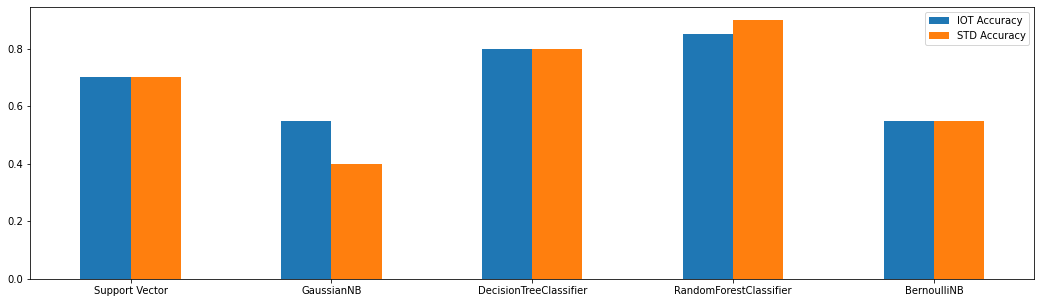

In [47]:
plt.figure(figsize=(18,5))

ax = plt.gca()
compare.plot.bar(rot=0, ax=ax)

plt.show()

<br><br><br>
<center> <h3 style="color:#005B9A">==========================================================</h3> </center>
<center> <h3 style="color:teal">جَزَاكَ ٱللَّٰهُ خَيْرًا</h3> 
<center> <h3 style="color:#005B9A">==========================================================</h3> </center>
<br><br><br>